# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Загрузка и первичный анализ данных


In [3]:
# Будем использовать только обучающую выборку
data = pd.read_csv('winemag-data-130k-v2.csv', sep=",")

In [4]:
# размер набора данных
data.shape

(129971, 14)

In [5]:
# типы колонок
data.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [6]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [7]:
# Первые 5 строк датасета
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [8]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 129971


# Обработка пропусков в данных

## Простые стратегии - удаление или заполнение нулями


In [9]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((129971, 14), (129971, 5))

Удаление колонок, содержащих пустые значения приведет к сокращению колонок с 14 до 5

In [10]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((129971, 14), (22387, 14))

Удаление строк, содержащих пустые значения приведет к сокращению строк с 129971 до 22387

In [11]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [12]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,0.0,Sicily & Sardinia,Etna,0,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,0,0,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",0,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,0,Alexander Peartree,0,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## "Внедрение значений" - импьютация (imputation)

### Обработка пропусков в числовых данных

In [13]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка price. Тип данных float64. Количество пустых значений 8996, 6.92%.


In [14]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,price
0,NaN
1,15.0
2,14.0
3,13.0
4,65.0
...,...
129966,28.0
129967,75.0
129968,30.0
129969,32.0


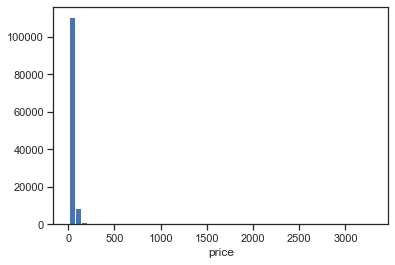

In [15]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [16]:
data_num_price = data_num[['price']]
data_num_price.head()

,price
0,NaN
1,15.0
2,14.0
3,13.0
4,65.0


In [17]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [18]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_price)
mask_missing_values_only

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

Попробуем заполнить пропущенные значения в колонке price значениями, вычисленными по среднему арифметическому, медиане и моде.

In [20]:
strategies=['mean', 'median', 'most_frequent']

In [23]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_price)
    return data_num_imp[mask_missing_values_only]

In [24]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([35.36338913, 35.36338913, 35.36338913, ..., 35.36338913,
        35.36338913, 35.36338913]))

In [25]:
strategies[1], test_num_impute(strategies[1])

('median', array([25., 25., 25., ..., 25., 25., 25.]))

In [26]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([20., 20., 20., ..., 20., 20., 20.]))

In [27]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [29]:
data[['price']].describe()

,price
count,120975.000000
mean,35.363389
std,41.022218
min,4.000000
25%,17.000000
50%,25.000000
75%,42.000000
max,3300.000000


In [30]:
test_num_impute_col(data, 'price', strategies[0])

('price', 'mean', 8996, 35.363389129985535, 35.363389129985535)

In [31]:
test_num_impute_col(data, 'price', strategies[1])

('price', 'median', 8996, 25.0, 25.0)

In [32]:
test_num_impute_col(data, 'price', strategies[2])

('price', 'most_frequent', 8996, 20.0, 20.0)

Получили вычисления по среднему арифметическому, медиане и моде, которые немного отличаются

### Обработка пропусков в категориальных данных

In [34]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка country. Тип данных object. Количество пустых значений 63, 0.05%.
Колонка designation. Тип данных object. Количество пустых значений 37465, 28.83%.
Колонка province. Тип данных object. Количество пустых значений 63, 0.05%.
Колонка region_1. Тип данных object. Количество пустых значений 21247, 16.35%.
Колонка region_2. Тип данных object. Количество пустых значений 79460, 61.14%.
Колонка taster_name. Тип данных object. Количество пустых значений 26244, 20.19%.
Колонка taster_twitter_handle. Тип данных object. Количество пустых значений 31213, 24.02%.
Колонка variety. Тип данных object. Количество пустых значений 1, 0.0%.


- Колонки, содержащие менее 30% пропусков выбираем для построения модели.
- Колонки, содержащие более 30% пропусков не выбираем для построения модели.

In [35]:
cat_temp_data = data[['region_1']]
cat_temp_data.head()

,region_1
0,Etna
1,NaN
2,Willamette Valley
3,Lake Michigan Shore
4,Willamette Valley


In [36]:
cat_temp_data['region_1'].unique()

array(['Etna', nan, 'Willamette Valley', ..., 'Del Veneto',
       'Bardolino Superiore', 'Paestum'], dtype=object)

In [37]:
cat_temp_data[cat_temp_data['region_1'].isnull()].shape

(21247, 1)

In [38]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Etna'],
       ['Napa Valley'],
       ['Willamette Valley'],
       ...,
       ['Alsace'],
       ['Alsace'],
       ['Alsace']], dtype=object)

In [39]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['Abruzzo', 'Adelaida District', 'Adelaide', ...,
       'Yorkville Highlands', 'Yountville', 'Zonda Valley'], dtype=object)

In [40]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Etna'],
       ['NA'],
       ['Willamette Valley'],
       ...,
       ['Alsace'],
       ['Alsace'],
       ['Alsace']], dtype=object)

In [41]:
np.unique(data_imp3)

array(['Abruzzo', 'Adelaida District', 'Adelaide', ...,
       'Yorkville Highlands', 'Yountville', 'Zonda Valley'], dtype=object)

In [42]:
data_imp3[data_imp3=='NA'].size

21247

Таким образом, в колонку region_1 вставлено 21247 "NA", вместо пропущенных значений.

# Преобразование категориальных признаков в числовые

In [43]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Etna
1,Napa Valley
2,Willamette Valley
3,Lake Michigan Shore
4,Willamette Valley
...,...
129966,Napa Valley
129967,Oregon
129968,Alsace
129969,Alsace


## Кодирование категорий целочисленными значениями - [label encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [44]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [45]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [46]:
cat_enc['c1'].unique()

array(['Etna', 'Napa Valley', 'Willamette Valley', ..., 'Del Veneto',
       'Bardolino Superiore', 'Paestum'], dtype=object)

In [47]:
np.unique(cat_enc_le)

array([   0,    1,    2, ..., 1226, 1227, 1228])

## Кодирование категорий наборами бинарных значений - [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [48]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [49]:
cat_enc.shape

(129971, 1)

In [50]:
cat_enc_ohe.shape

(129971, 1229)

In [51]:
cat_enc_ohe

<129971x1229 sparse matrix of type '<class 'numpy.float64'>'
	with 129971 stored elements in Compressed Sparse Row format>

In [52]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
cat_enc.head(10)

,c1
0,Etna
1,Napa Valley
2,Willamette Valley
3,Lake Michigan Shore
4,Willamette Valley
5,Navarra
6,Vittoria
7,Alsace
8,Napa Valley
9,Alsace


## [Pandas get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) - быстрый вариант one-hot кодирования

In [54]:
pd.get_dummies(cat_enc).head()

,c1_Abruzzo,c1_Adelaida District,c1_Adelaide,c1_Adelaide Hills,c1_Adelaide Plains,c1_Aglianico d'Irpinia,c1_Aglianico del Beneventano,c1_Aglianico del Taburno,c1_Aglianico del Vulture,c1_Agrelo,...,c1_Yadkin Valley,c1_Yakima Valley,c1_Yamhill County,c1_Yarra Valley,c1_Yecla,c1_Yolo County,c1_York Mountain,c1_Yorkville Highlands,c1_Yountville,c1_Zonda Valley
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,region_1_Abruzzo,region_1_Adelaida District,region_1_Adelaide,region_1_Adelaide Hills,region_1_Adelaide Plains,region_1_Aglianico d'Irpinia,region_1_Aglianico del Beneventano,region_1_Aglianico del Taburno,region_1_Aglianico del Vulture,region_1_Agrelo,...,region_1_Yakima Valley,region_1_Yamhill County,region_1_Yarra Valley,region_1_Yecla,region_1_Yolo County,region_1_York Mountain,region_1_Yorkville Highlands,region_1_Yountville,region_1_Zonda Valley,region_1_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Масштабирование данных

- MinMax масштабирование:
$$ x_{новый} = \frac{x_{старый} - min(X)}{max(X)-min(X)} $$

В этом случае значения лежат в диапазоне от 0 до 1.
- Масштабирование данных на основе [Z-оценки](https://ru.wikipedia.org/wiki/Z-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0):
$$ x_{новый} = \frac{x_{старый} - AVG(X) }{\sigma(X)} $$

В этом случае большинство значений попадает в диапазон от -3 до 3.

где $X$ - матрица объект-признак, $AVG(X)$ - среднее значение, $\sigma$ - среднеквадратичное отклонение.

In [56]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

## [MinMax масштабирование](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [57]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['price']])

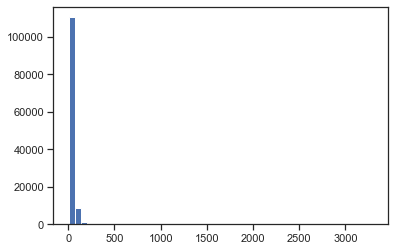

In [58]:
plt.hist(data['price'], 50)
plt.show()

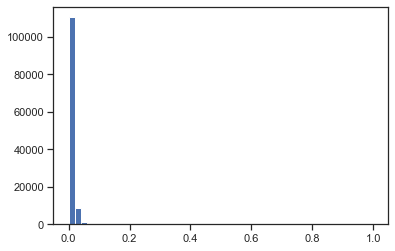

In [59]:
plt.hist(sc1_data, 50)
plt.show()

Таким образом, получили значения из начальных 0-3000 в конечные 0-1.

## Масштабирование данных на основе [Z-оценки](https://ru.wikipedia.org/wiki/Z-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0) - [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [60]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['price']])

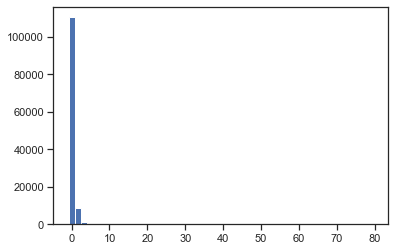

In [62]:
plt.hist(sc2_data, 50)
plt.show()

Таким образом, получили значения из начальных 0-3000 в конечные 0-80.